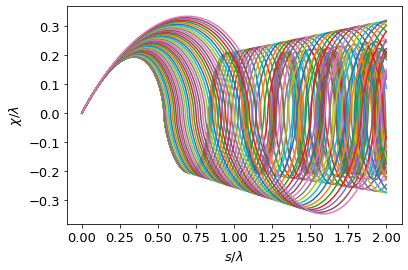

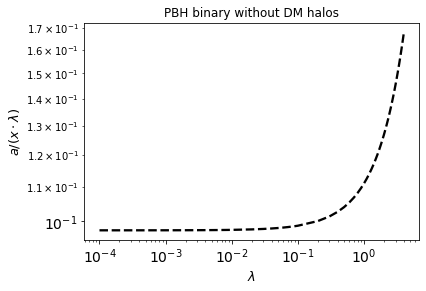

In [1]:
# For PBH binaries without dark matter halos and decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".


#Semi-major axis, a=C.λ.x where, C=constant and x=comoving separation of the PBH binary.

# a/(x.λ) is dimensionless.

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equality






λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]


def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   


def semi(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        c=A/2                   # c=a/(x.λ) as Bs=separations/λ_0.
        if Δ<0:
            break
    
    return c



a_list=np.zeros(len(λ_list))    
for k, λ_0 in enumerate(λ_list):
    a_list[k] = semi(λ_0)
     
plt.rc('lines', linewidth=2.3) 


plt.figure(figsize=(6,4))    
plt.loglog(λ_list,a_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/(x\cdotλ)$',fontsize=13)   # a = semi-major axis of the PBH binary.        
plt.title('PBH binary without DM halos')
plt.show()   

p=  
0.01652 x + 0.09647


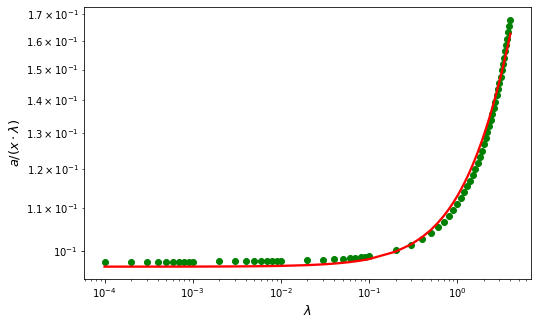

Maximum Percentage error= 3.1084 %


In [2]:
# Fitting of the the curve for a/(x.λ) vs λ for the PBH binary without 
# dark matter halos.


x = np.array(λ_list)

y = np.array(a_list)  


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print("p=",p)


plt.figure(figsize=(8,5))
plt.yscale('log')
plt.loglog(x,y,'go')
plt.plot(x,p(x),'r')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/(x\cdotλ)$',fontsize=13)
plt.show()

#This gives semi-major axis, a/x=(0.09647λ+0.01652λ^2)m=(0.0965λ+0.01652λ^2)




#Calculation of the Percentage error in the numerical and fitted value of semi-major axis, a/(x.λ) 
#for PBH binary without dark matter halos.

y_list = y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (y,q) in enumerate(zip(y_list,q_list)):
    error_list[i] = percentage_error(y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

p=           2
0.001421 x + 0.01178 x + 0.09761


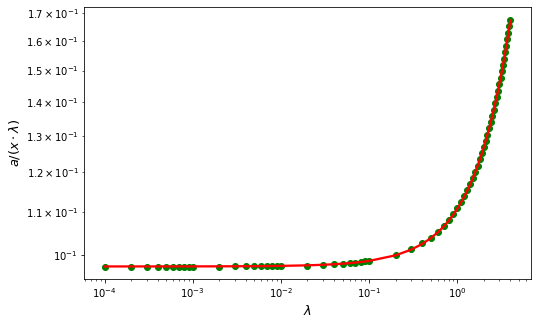

Maximum Percentage error= 0.1783 %


In [3]:
# Fitting of the the curve for the value of semi-major axis, a/(x.λ) vs λ for the PBH binary 
# without dark matter halos.


x = np.array(λ_list)

y = np.array(a_list)  


z = np.polyfit(x, y, 2)
p = np.poly1d(z)
print("p=",p)


plt.figure(figsize=(8,5))
plt.yscale('log')
plt.loglog(x,y,'go')
plt.plot(x,p(x),'r')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/(x\cdotλ)$',fontsize=13)
plt.show()

#This gives semi-major axis, a/x=(0.09761λ+0.01178λ^2)m.




#Calculation of the Percentage error in the numerical and fitted value of semi-major axis, a/(x.λ) 
#for PBH binary without dark matter halos.

y_list = y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (y,q) in enumerate(zip(y_list,q_list)):
    error_list[i] = percentage_error(y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

p=            3             2
7.826e-05 x + 0.0009886 x + 0.01234 x + 0.09756


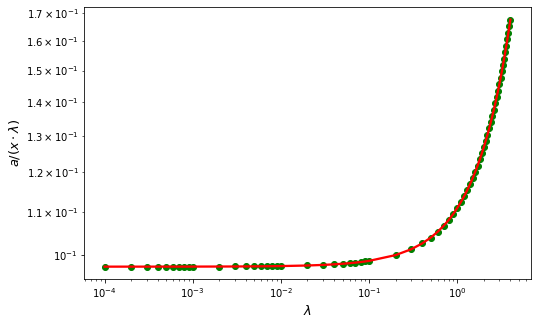

Maximum Percentage error= 0.0071 %


In [4]:
# Fitting of the the curve for the value of semi-major axis, a/(x.λ) vs λ for the PBH binary without 
# dark matter halos.


x = np.array(λ_list)

y = np.array(a_list)  


z = np.polyfit(x, y, 3)
p = np.poly1d(z)
print("p=",p)


plt.figure(figsize=(8,5))
plt.yscale('log')
plt.loglog(x,y,'go')
plt.plot(x,p(x),'r')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/(x\cdotλ)$',fontsize=13)
plt.show()

#This gives semi-major axis, a/x=(0.09756λ+0.01234λ^2)m.




#Calculation of the Percentage error in the numerical and fitted value of semi-major axis, a/(x.λ) 
#for PBH binary without dark matter halos.

y_list = y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (y,q) in enumerate(zip(y_list,q_list)):
    error_list[i] = percentage_error(y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

p=            4             3            2
3.106e-06 x + 5.449e-05 x + 0.001044 x + 0.0123 x + 0.09757


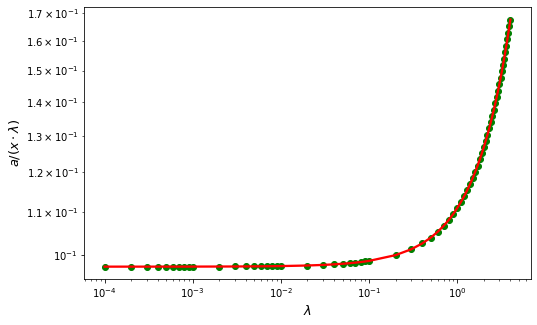

Maximum Percentage error= 0.0003 %


In [5]:
# Fitting of the the curve for the value of semi-major axis, a/(x.λ) vs λ for the PBH binary 
# without dark matter halos.


x = np.array(λ_list)

y = np.array(a_list)  


z = np.polyfit(x, y, 4)
p = np.poly1d(z)
print("p=",p)


plt.figure(figsize=(8,5))
plt.yscale('log')
plt.loglog(x,y,'go')
plt.plot(x,p(x),'r')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/(x\cdotλ)$',fontsize=13)
plt.show()

#This gives semi-major axis, a/x=(0.09757λ+0.0123λ^2)m.




#Calculation of the Percentage error in the numerical and fitted value of semi-major axis, a/(x.λ) 
#for PBH binary without dark matter halos.

y_list = y.tolist()
q= np.array(p(x))
q_list=q.tolist()

def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100



error_list=np.zeros(len(λ_list))

for i, (y,q) in enumerate(zip(y_list,q_list)):
    error_list[i] = percentage_error(y, q)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

In [9]:
# For PBH binaries with dark matter halos and decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries with DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".

#Definition of the mass of the DM halos and the time of decoupling as per "PBH-binary"-notes.

def t(s):  # Time of binary decouple, t_dec given  by eq.(32) in "PBH-binary" notes.
    return ((math.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s-2)*math.sqrt(s+1))+(4/3)))

def ρ_bar(M_PBH):
    return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*M_PBH)**(3/4)))


def M_halo(M_PBH,s):#Initial mass of the dark halo of PBH having mass M_PBH given by eq.(24) in "PBH-binary" notes.          
    return (((16*π)/3)*ρ_bar(M_PBH)*((2*G*M_PBH*(t(s)**2))**(1/4)))

def n(s): #Eq.(42) in "PBH-binary" notes.
    return (1/(1+((M_halo(M_1PBH,s)+M_halo(M_2PBH,s))/(M_1PBH+M_2PBH))))
                   
def λ_mr(s): #Eq.(40) in "PBH-binary" notes.
    return λ_0*n(s)
   

def semi_(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_mr(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ')
    plt.ylabel('χ/λ')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        c=A/2                                  # c=a/(x.λ) as Bs=separations/λ_0.
        if Δ<0:
           
            break
       
    return c
    
a_halo_list=np.zeros(len(λ_list))  # a = semi-major axis of the PBH binary.
for k, λ_0 in enumerate(λ_list):
    a_halo_list[k] = semi_(λ_0)


    
plt.figure(figsize=(6,4))    
plt.loglog(λ_list,a_halo_list,'C1')
plt.xlabel('$λ$',fontsize=13) 
plt.ylabel('$a/(x\cdotλ)$',fontsize=13)         
plt.title('PBH binary with DM halos')        
plt.show() 

NameError: name 'M_1PBH' is not defined